In [390]:
import numpy
import pandas

# Activating plotting
import matplotlib.pyplot as plt
%matplotlib inline

# things we already know
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# things we learn today
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR

## Loading data

again, let's use wines dataset

In [391]:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
y = data['quality'].values
X = data.drop('quality', axis=1)

In [392]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0


In [393]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42)

## Constant prediction

metric of interest is `mean_squared_error`, which should be minimized

In [394]:
numpy.mean(trainY) # optimal grade is mean grade

5.8687721208821131

In [395]:
mean_squared_error(testY, numpy.zeros(len(testY)) + numpy.mean(trainY) )

0.77767392527381973

## Linear models

In [396]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX)) 

0.0 	0.564587791519
0.001 	0.568293991144
0.01 	0.573570550784
0.1 	0.574990791682
1 	0.575287625141
10 	0.576469007479
100 	0.593064358623


## Linear models with non linear features

first normalizing features, then applying non-linear transformations

In [397]:
from sklearn.preprocessing import StandardScaler
# first, standatize all features by scaling (mean = 0, std = 1)
scaler = StandardScaler()
scaler.fit(X) # compute means and variance, compute transformation parameters 
X_extend = scaler.transform(X) # transform to get (mean = 0, std = 1)
X_extend = pandas.DataFrame(X_extend, columns=X.columns) # convert to pandas and return names to columns

In [398]:
for f in X_extend.columns:
    # some quessed features
    X_extend[f + '_abs']  = numpy.abs(X_extend[f])
    X_extend[f + '_tanh'] = numpy.tanh(X_extend[f])

In [399]:
X_extend.shape

(4898, 33)

In [400]:
trainX_extended, testX_extended = train_test_split(X_extend, random_state=42)

In [401]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX_extended, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX_extended)) 

0.0 	0.516931032212
0.001 	0.516931019462
0.01 	0.516930904672
0.1 	0.516929753694
1 	0.516918023577
10 	0.516826197999
100 	0.518524350888


## Short summary

- nonlinear features can improve quality of linear models
    - good features will certainly do
- more features can be handled with regularization
    - even more than number of observations

## Decision tree 

<img src='http://cdn.edureka.co/blog/wp-content/uploads/2015/01/tree2.png' width=600 />

## Decision Tree for regression

In [402]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(min_samples_leaf=20)
tree_reg.fit(trainX, trainY) # build a tree
predicted_test_grades = tree_reg.predict(testX)
print mean_squared_error(testY, predicted_test_grades)

0.516409672224


### Plotting decision rules

decision rule is piecewise-constant

In [403]:
# Create a random dataset. This is the way to get repropducible 
rng = numpy.random.RandomState(1)
X_toy = numpy.sort(5 * rng.rand(80, 1), axis=0)
y_toy = numpy.sin(X_toy).ravel() + rng.laplace(size=80) * 0.2

In [404]:
# loading additional functions from utils.py
# those will help with visualization
from utils import plot_regressor_decision, plot_classifier_decision, plot_regressor_decision_2d

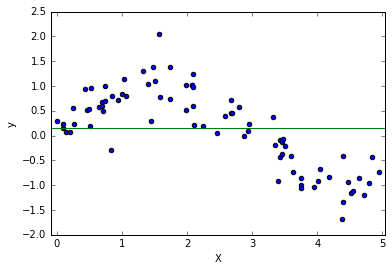

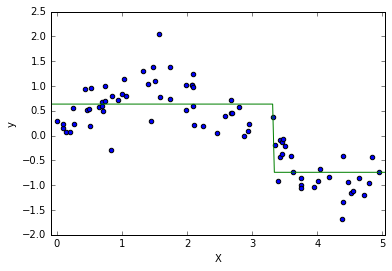

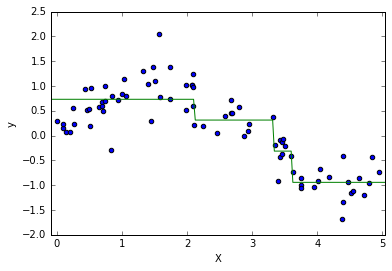

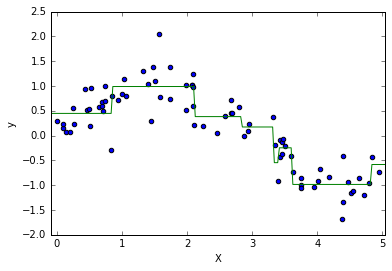

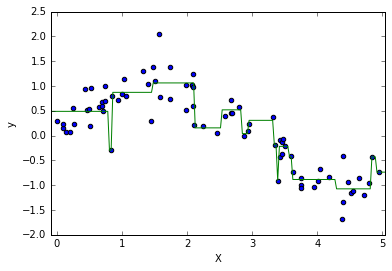

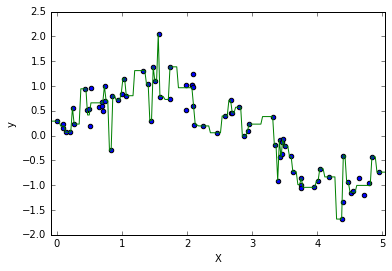

In [405]:
# replacement for 0-depth tree in the demo
from sklearn.dummy import DummyRegressor
tree_reg = DummyRegressor().fit(X_toy, y_toy)
plot_regressor_decision(tree_reg, X_toy, y_toy)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

for depth in [1, 2, 3, 4, 8]:
    tree_reg = DecisionTreeRegressor(max_depth=depth).fit(X_toy, y_toy)
    plot_regressor_decision(tree_reg, X_toy, y_toy)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

## Decision trees for classification

(<matplotlib.text.Text at 0x7feef1104310>,
 <matplotlib.text.Text at 0x7feef11ed9d0>)

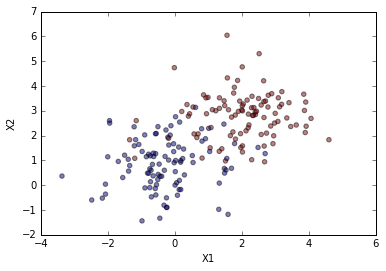

In [406]:
# generate two classes with features
from sklearn.datasets import make_blobs

X_toy, y_toy = make_blobs(n_samples=200, centers=[[0, 1], [2, 3]], random_state=14)
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.5)
plt.xlabel('X1'), plt.ylabel('X2')

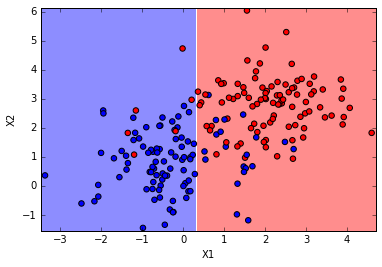

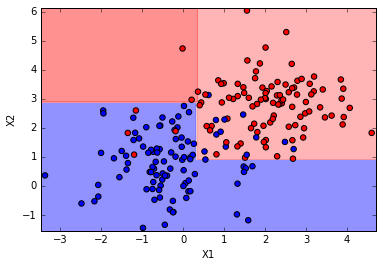

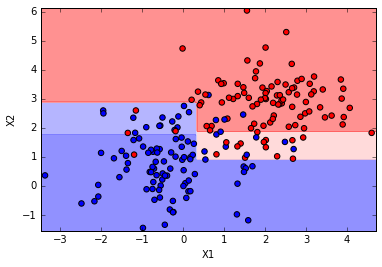

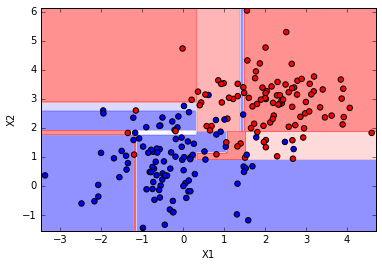

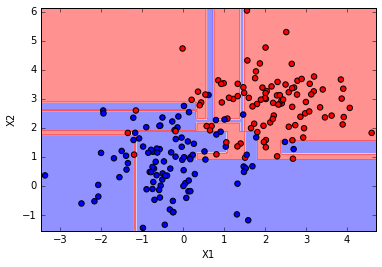

In [407]:
for depth in [1, 2, 3, 5, 10]:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_toy, y_toy)
    plot_classifier_decision(tree_clf, X_toy, y_toy)
    plt.xlabel('X1'), plt.ylabel('X2')
    plt.show()

# Pre-stopping

**Exercise:** provide similar plots for min_samples_leaf=1, 2, 3, 5, 10

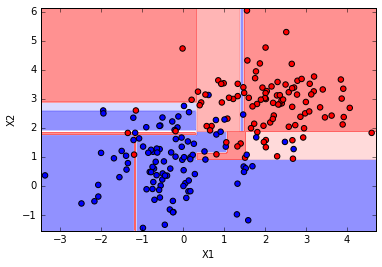

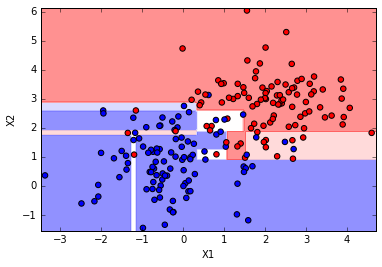

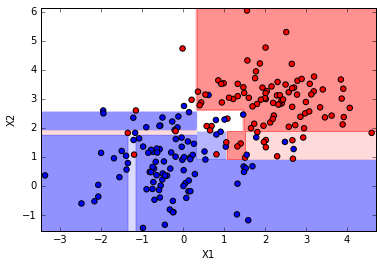

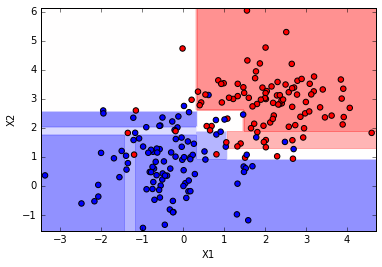

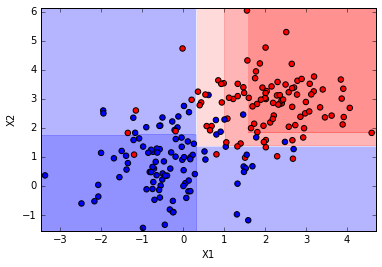

In [408]:
for min_samples_leaf in [1, 2, 3, 5, 10]:
    tree_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=min_samples_leaf)
    tree_clf.fit(X_toy, y_toy)
    plot_classifier_decision(tree_clf, X_toy, y_toy)
    plt.xlabel('X1'), plt.ylabel('X2')
    plt.show()

## Notes on Decision Tree:

- independent on features scale
- during classification decision tree returns probability
- pre-stopping matters (`max_depth`, `min_samples_leaf`)

## Logistic regression

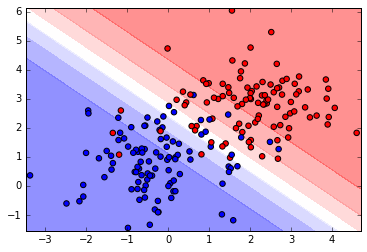

In [409]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_toy, y_toy)
plot_classifier_decision(clf, X_toy, y_toy)

## SVM + RBF kernel (generalized linear model)

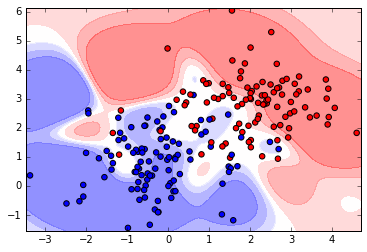

In [410]:
clf = SVC(C=10000., probability=True).fit(X_toy, y_toy) # C is inverse regularization
plot_classifier_decision(clf, X_toy, y_toy)

To get an idea of adding new features for linear models: https://www.youtube.com/watch?v=3liCbRZPrZA

# Back to wines

## KNN 

In [411]:
for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbours)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX)) 

1 0.774693877551
2 0.672857142857
3 0.648526077098
5 0.644897959184
7 0.646697209496
10 0.636065306122
20 0.637524489796
50 0.657922612245


In [412]:
# define weight for each sample depending on its distance
def my_distance_function(distances):
    return (1. + distances) ** (-2)

for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbours, weights=my_distance_function)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX))

1 0.774693877551
2 0.612036916536
3 0.563940292579
5 0.528197975204
7 0.520313098314
10 0.502240780366
20 0.495320989021
50 0.509391945293


In [413]:
for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(metric='canberra', n_neighbors=n_neighbours)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX)) 

1 0.623673469388
2 0.575510204082
3 0.526258503401
5 0.49946122449
7 0.507871720117
10 0.504236734694
20 0.506251020408
50 0.525772734694


## Pipelines with Standard Scaler

first standardize each variable, then use simple kNN. 
Standardizing can be done with `StandardScaler` separately or one can build it into pipeline. 

In [414]:
from sklearn.pipeline import make_pipeline

# pipeline: Standardize features, then apply kNN regression.
knn_pipe_reg = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
knn_pipe_reg.fit(trainX, trainY)

print 'train', mean_squared_error(testY, knn_pipe_reg.predict(testX))
print 'test', mean_squared_error(trainY, knn_pipe_reg.predict(trainX))

train 0.479053061224
test 0.339047100463


(2, 9)

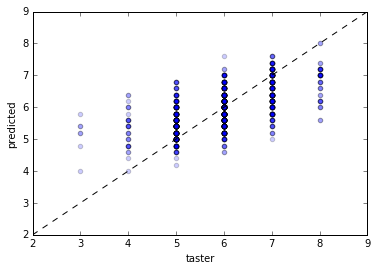

In [415]:
plt.scatter(testY, knn_pipe_reg.predict(testX), alpha=0.2)
plt.plot([2, 9], [2, 9], 'k--')
plt.xlabel('taster'), plt.ylabel('predicted')
plt.xlim(2, 9)
plt.ylim(2, 9)

## Combining predictions

In [416]:
regressors = [
    DecisionTreeRegressor(max_depth=6),
    KNeighborsRegressor(metric='canberra', n_neighbors=5),
]

for reg in regressors:
    reg.fit(trainX, trainY)
    print mean_squared_error(testY, reg.predict(testX)), reg

0.536658053917 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
0.49946122449 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='canberra',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


**Averaging** predictions. We could use different coefficient to mix results

In [417]:
print mean_squared_error(testY, sum(reg.predict(testX) for reg in regressors) / len(regressors))
# print mean_squared_error(trainY, sum(reg.predict(trainX) for reg in regressors) / len(regressors))

0.458375344797


## kFolding 

One of cross-validation strategies, each sample is used once in testing

In [418]:
from sklearn.cross_validation import KFold

qualities = []
for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]

    tree_reg = DecisionTreeRegressor(max_depth=10)
    tree_reg.fit(fold_trainX, fold_trainY)
    qualities.append(mean_squared_error(fold_testY, tree_reg.predict(fold_testX)))
    
print qualities
print numpy.mean(qualities)

[0.82008225676765678, 0.93303559507575506, 0.7087851159616968, 0.78351357232853625, 0.68724142940206412]
0.786531593907


# Homework (due to 30 Jan 23:59)

** Exercise #0. (2 points)** Compare using kFold which algorithm gives more stable (= less variation in MSE on testing) result: decision tree or linear regression?

In [419]:
# DecisionTreeRegressor
from sklearn.cross_validation import KFold

qualitiesDT = []
for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]

    tree_reg = DecisionTreeRegressor(max_depth=10)
    tree_reg.fit(fold_trainX, fold_trainY)
    qualitiesDT.append(mean_squared_error(fold_testY, tree_reg.predict(fold_testX)))
    
# Ridge
from sklearn.linear_model import Ridge
qualitiesRidge = []
for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]

    lin_reg = Ridge()
    lin_reg.fit(fold_trainX, fold_trainY)
    qualitiesRidge.append(mean_squared_error(fold_testY, lin_reg.predict(fold_testX)))
    
print qualitiesRidge
print numpy.mean(qualitiesRidge)
print 'STD for Ridge KFOLD is:',numpy.std(qualitiesRidge)
print 'STD for Decision tree KFOLD is:',numpy.std(qualitiesDT)

[0.71022734536665755, 0.59552845985505887, 0.57638704789160722, 0.54589454163845141, 0.51231804150690452]
0.588071087252
STD for Ridge KFOLD is: 0.0672780283867
STD for Decision tree KFOLD is: 0.0863266013785


** Exercise #1. (1 point)** Fine-tune the regression decision tree. Achieve minimal MSE using kFold cross-validation.
   Parameters to tune: `max_depth, min_samples_split, min_samples_leaf`

In [420]:
# min_samples_leaf in [10,50,100]
print 'Best MSE is found for:'

for min_samples_leaf in [90]:
    for max_depth in [100]:
        for min_samples_split in [200]:
            qualitiesDT = []
            for train_indices, test_indices in KFold(len(X), n_folds=5):
                fold_trainX = X.iloc[train_indices, :]
                fold_testX  = X.iloc[test_indices, :]
                fold_trainY = y[train_indices]
                fold_testY  = y[test_indices]
                tree_reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=min_samples_leaf\
                                     ,min_samples_split=2)
                tree_reg.fit(fold_trainX, fold_trainY)
                qualitiesDT.append(mean_squared_error(fold_testY, tree_reg.predict(fold_testX)))
    
# print qualitiesDT
            print numpy.mean(qualitiesDT),'for: min_samples_leaf=',min_samples_leaf,\
    ';max_depth=',max_depth,';min_samples_split=',min_samples_split


Best MSE is found for:
0.584719353595 for: min_samples_leaf= 90 ;max_depth= 100 ;min_samples_split= 200


** Exercise #2. (2 point)** Split the data into two parts (50% each), on each part train a decision tree (with any parameters) and compare the structure of trees. Are they similar? <br /> (Below you have the code to display tree's structure)

In [421]:
import pydot_ng
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import SVG
from sklearn.cross_validation import train_test_split


def plot_tree(tree, columns, max_depth):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=columns, max_depth=max_depth)
    graph = pydot_ng.graph_from_dot_data(dot_data.getvalue())
    return SVG(graph.create_svg())

data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
y = data['quality'].values
X = data.drop('quality', axis=1)

BatchX, Batch2X, BatchY, Batch2Y = train_test_split(X, y, random_state=42,train_size=0.5)

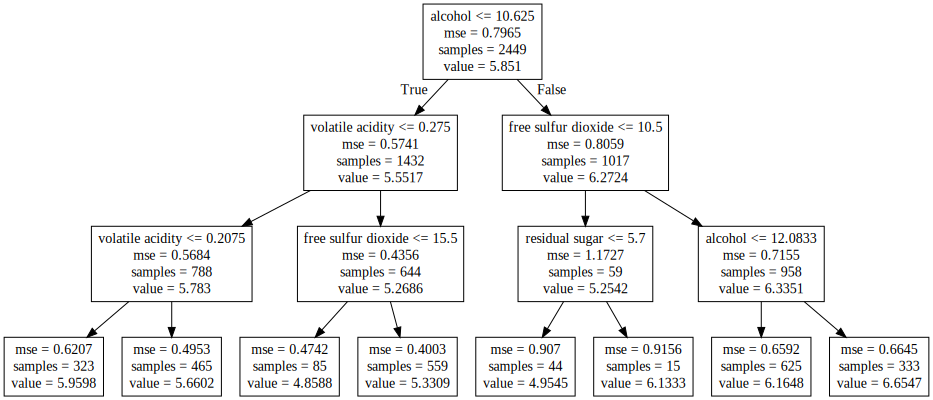

In [422]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(BatchX, BatchY)
plot_tree(tree_reg, X.columns, max_depth=3)

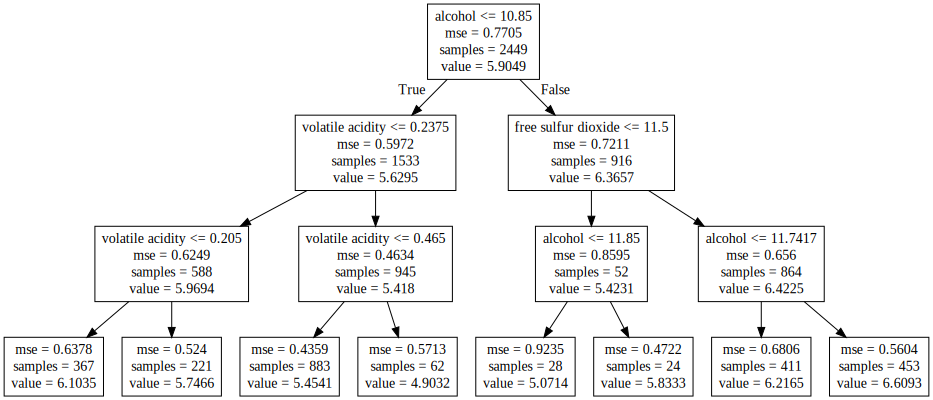

In [423]:
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(Batch2X, Batch2Y)
plot_tree(tree_reg2, X.columns, max_depth=3)

* Discussion:
The tree constructed from two bathces have similar structure in the first depth (after the root), but with different values. The trees start to diverge as we go deeper and deeper... 

** Exercise #3. (2 point)** Mix up knn, ridge with non-linear features and a decision tree. Find appropriate coefficients in linear combination to get minimal MSE on a holdout.

In [424]:
import pandas as pd
# Data:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
y = data['quality'].values
X = data.drop('quality', axis=1)
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42,train_size=0.7)

qualitiesRidge=[]
qualitiesKnn=[]
# KNN:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(trainX, trainY)
predicted_knn = knn_clf.predict(testX)

print 'MSE of KNN:',(mean_squared_error(testY, knn_clf.predict(testX)))

# non-linear Ridge:

from sklearn.linear_model import Ridge

X_nonlinear=numpy.hstack((X,(X**2)))# stacking non linear term
# X_nonlinear=X
trainXnl, testXnl, trainYnl, testYnl = train_test_split(X_nonlinear, y, random_state=42,train_size=0.7)

lin_reg = Ridge()
lin_reg.fit(trainXnl, trainYnl)
predicted_lin_reg = lin_reg.predict(testXnl)

print 'MSE of linear regression:', (mean_squared_error(testYnl, lin_reg.predict(testXnl)))

# Decision tree:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf=20)
tree_reg.fit(trainX, trainY) # build a tree
predicted_dec_tree = tree_reg.predict(testX)

print 'MSE of decision tree:',mean_squared_error(testY, predicted_dec_tree)

# linear combination:
# combine me three predictions into a 3-d features table (X'):
df=pd.DataFrame({'KNN':predicted_knn,'LinearReg':predicted_lin_reg,'Decision_tree':predicted_dec_tree})
X=numpy.array(df)
lin_reg.fit(df, testY)

df['combined models']=lin_reg.predict(df)
df['True Values']=testY
print 'MSE of xombined methods:',(mean_squared_error(testY, df['combined models']))
print 'coefficeints:', lin_reg.coef_

df




# take the data values and call it y (do nothing)
#  preform linear regresion on the X' with y answers.


MSE of KNN: 0.907482993197
MSE of linear regression: 0.656004857411
MSE of decision tree: 0.52754247857
MSE of xombined methods: 0.460444195614
coefficeints: [ 0.54416304  0.21639721  0.24497067]


,Decision_tree,KNN,LinearReg,combined models,True Values
0,6.333333,7,6.273745,6.558997,7
1,7.190476,7,6.542774,7.091327,8
2,6.560000,6,6.534673,6.529864,8
3,5.270270,5,5.847082,5.443203,5
4,6.880000,6,6.432981,6.679084,7
5,6.100000,5,6.090359,5.954308,6
6,5.285714,4,5.128036,5.059065,5
7,5.354839,4,5.300764,5.138993,4
8,6.031250,6,5.829750,6.069452,6
9,5.025641,5,5.237329,5.160714,5


### Completed?
Rename the notebook to `3.2-Surname-trees.ipynb`, download (`File > Download as .ipynb`) and send to `icl.ml@yandex.ru` with topic `2-Surname`